<a href="https://colab.research.google.com/github/hansonnguy/MAT-421/blob/main/Module_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 5 - Hanson Nguyen

# **1.1 Introduction**


---

We can use python to solve linear algebra problems. Here, I will demonstrate some basic linear algebra functions like the dot product and linear combinations.

In [10]:
# Here, we will perform a dot product and cross product on vectors
import numpy as np
row = np.array([[6, 5, 4, 3, 2]])
col = np.array([[1], [2], [3], [4], [5]])

print("Row Vector: " , row)
print("Column Vector: " , col)

# for orthogonal vectors, the dot product is 0 and the cross product is a orthogonal vector w.r.t. both v and w
v = np.array([0,1,0])
w = np.array([1,0,1])
w_transpose = np.transpose(w)

print("Dot Product of v and w: " , np.dot(v, w_transpose))
print("Cross Product of v and w: " , np.cross(v, w))


Row Vector:  [[6 5 4 3 2]]
Column Vector:  [[1]
 [2]
 [3]
 [4]
 [5]]
Dot Product of v and w:  0
Cross Product of v and w:  [ 1  0 -1]


In [11]:
# We can also ensure that the vectors are orthonormal by normalizing the orthogonal matrices:

v_norm = v / np.linalg.norm(v)
w_norm = w / np.linalg.norm(w)

print("Normalized v: " , v_norm)
print("Normalized w: " , w_norm)

print("Dot Product of normalized v and normalized w: " , np.dot(v, w_transpose))
print("Magnitude of normalized v and normalized w" , np.linalg.norm(w_norm), np.linalg.norm(v_norm))

Normalized v:  [0. 1. 0.]
Normalized w:  [0.70710678 0.         0.70710678]
Dot Product of normalized v and normalized w:  0
Magnitude of normalized v and normalized w 0.9999999999999999 1.0


# **1.2 Elements of Linear Algebra**


---

We can built on orthonormal vectors to construct a set orthonormal basis vectors that span a vector space. We can do this through the Gram-Schmidt process for generating orthonormal vectors:

In [31]:
import numpy as np

# this function takes in a matrix A, which composes of a vector basis, and then generates an orthonormal basis about the first vector
def gram_schmidt(A):

    (n, m) = A.shape

    for i in range(m):

        q = A[:, i] # i-th column of A

        for j in range(i):
            q = q - np.dot(A[:, j], A[:, i]) * A[:, j]

        if np.array_equal(q, np.zeros(q.shape)):
            raise np.linalg.LinAlgError("The column vectors are not linearly independent")

        # normalize q
        q = q / np.sqrt(np.dot(q, q))

        # write the vector back in the matrix
        A[:, i] = q

M = np.array([
            [1.0, 1.0, -3.0],
            [3.0, 2.0, 1.0],
            [-2.0, 0.5, 2.5]
        ])

gram_schmidt(M)
print('M: ', M)

# check orthogonality
print('dot products of each basis vector')
for i in range(M.shape[1]):
    for j in range(M.shape[1]):
        if i != j:
            print(np.dot(M[:, i], M[:, j]))

# check normality
print('norm of each basis vector')
for i in range(M.shape[1]):
    print(np.linalg.norm(M[:, i]))

M:  [[ 0.26726124  0.34914862 -0.89814624]
 [ 0.80178373  0.43643578  0.40824829]
 [-0.53452248  0.82922798  0.16329932]]
dot products of each basis vector
-1.6653345369377348e-16
1.249000902703301e-16
-1.6653345369377348e-16
-1.3877787807814457e-16
1.249000902703301e-16
-1.3877787807814457e-16
norm of each basis vector
1.0
1.0
1.0


Another interesting application of linear algebra is to solve a set of linear equations. The first method we will look at is the LU decomposition, which simplifies a matrix into an upper and lower triangular matrix for Gauss-Jordan elimination. We can use scipy to perform the LU decomposition for us:



In [36]:
import scipy
import scipy.linalg   # SciPy Linear Algebra Library

A = np.array([ [7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
P, L, U = scipy.linalg.lu(A)

print("A:", A)
print("P:", P)
print("L:", L)
print("U:", U)

A: [[ 7  3 -1  2]
 [ 3  8  1 -4]
 [-1  1  4 -1]
 [ 2 -4 -1  6]]
P: [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
L: [[ 1.          0.          0.          0.        ]
 [ 0.42857143  1.          0.          0.        ]
 [-0.14285714  0.21276596  1.          0.        ]
 [ 0.28571429 -0.72340426  0.08982036  1.        ]]
U: [[ 7.          3.         -1.          2.        ]
 [ 0.          6.71428571  1.42857143 -4.85714286]
 [ 0.          0.          3.55319149  0.31914894]
 [ 0.          0.          0.          1.88622754]]


The Gauss-Seidel method is an iterative method that finds the solution to a linear equation by iterating over an intial guess. We can write the explicit form of a sysytem linear equations as:

$x_i=\frac{1}{a_{i,i}}[y_i−\sum_{j=1,j\neq i}a_{i,j}x_j]$

To ensure convergence, we can ensure that the matrix is diagonally dominantly.  That is, for each row of matrix $A$, representing the coefficients, the absolute value of the diagonal element $|a_{i,i}|$ is greater than the absolute value of the sum absolute values of the off diagonal elements $\sum_j|a_{i,j}|. The condition is not a necessary one, but it guarantees convergence nonetheless



In [37]:
A = [[8, 3, -3], [-2, -8, 5], [3, 5, 10]]

# Find diagonal coefficients
diag = np.diag(np.abs(a))

# Find row sum without diagonal
off_diag = np.sum(np.abs(a), axis=1) - diag

if np.all(diag > off_diag):
    print('matrix is diagonally dominant')
else:
    print('NOT diagonally dominant')

matrix is diagonally dominant


In [71]:
def GS_method(A, Y, X):
    n = len(A)
    for j in range(0, n):
        summ_val = Y[j]
        for i in range(0, n):
            if (j!=i):
                summ_val-=A[j] [i] * X[i]
        X[j] = summ_val/A[j][j]
    return X

A = [[8, 3, -3],[-2, -8, 5],[3, 5, 10]] #coefficients
Y = [14, 5, -8] # y terms
X = [0, 0, 0] #initial guess

epsilon = 1e-5
for i in range(100):
  X_old = X
  X = GS_method(A, Y, X)
  print(i, X)

0 [1.75, -1.0625, -0.79375]
1 [1.85078125, -1.5837890625, -0.56333984375]
2 [2.13266845703125, -1.5102545166015626, -0.6846732788085935]
3 [2.0595929641723636, -1.567819040298462, -0.6339683691024781]
4 [2.100194001698494, -1.5462787311136723, -0.6569188349527121]
5 [2.08350996106036, -1.556451762110535, -0.6468271072628407]
6 [2.0911092455678855, -1.5520442534312466, -0.6513106469547424]
7 [2.0877751024286892, -1.5540129299538863, -0.6493260657516635]
8 [2.0892575740758335, -1.5531431846137482, -0.6502056799158759]
9 [2.088601564261702, -1.5535289410128479, -0.6498159987720867]
10 [2.0888923533402854, -1.5533580875676256, -0.6499886622182729]
11 [2.0887635345060076, -1.5534337975129224, -0.649912161595341]
12 [2.088820613469093, -1.5534002543643612, -0.6499460568585473]
13 [2.08879532406468, -1.553415116552762, -0.649931038943023]
14 [2.0888065291036524, -1.5534085316153026, -0.6499376929234444]
15 [2.088801564509447, -1.5534114492045146, -0.6499347447505768]
16 [2.088803764170227, -1

# **19.3 Linear Regression**


---

We can use the QR decomposition technique iteratively to eventually obtain a matrix $A$ such that its diagonal values are the eigenavlues:
$A_{k+1}=R_kQ_k=Q^{−1}_kQ_kR_kQ_k=Q^{−1}_kA_kQ_k$

In [74]:
import numpy as np
from numpy.linalg import eig
from numpy.linalg import qr

a = np.array([[0, 2],
              [2, 3]])
p = [1, 5, 10, 20]
for i in range(20):
    q, r = qr(a)
    a = np.dot(r, q)
    if i+1 in p:
        print(f'Iteration {i+1}:')
        print(a)

w, v = eig(a)
print(w)

Iteration 1:
[[3. 2.]
 [2. 0.]]
Iteration 5:
[[ 3.99998093  0.00976559]
 [ 0.00976559 -0.99998093]]
Iteration 10:
[[ 4.00000000e+00  9.53674316e-06]
 [ 9.53674316e-06 -1.00000000e+00]]
Iteration 20:
[[ 4.00000000e+00  9.09484250e-12]
 [ 9.09494702e-12 -1.00000000e+00]]
[ 4. -1.]


The goal of least squares regression is to minimize the total error of data points with respect to some function, We define the total squared error, $E$
as $E=\sum_i(\hat{y}−y_i)^2$ with individual errors (or residuals) $e_i=(\hat{y}−y_i)$

We can use the least squares regression formula $\beta=(A^TA)^{−1}A^TY$ where $\beta$ is a column vector such that $\beta_i=\alpha_i$ (coefficients for each function), $F_i(x)$
is a function that returns a column vector of $f_i(x)$ and $A$ is an $m\times n$
 matrix where that the $i$-th column of $A$ is $F_i(x)$. We want to estimate $\beta$. We call (A^TA)^{−1}A^T the pseudo-inverse of $A$


[[1.45994671]
 [4.98407853]]


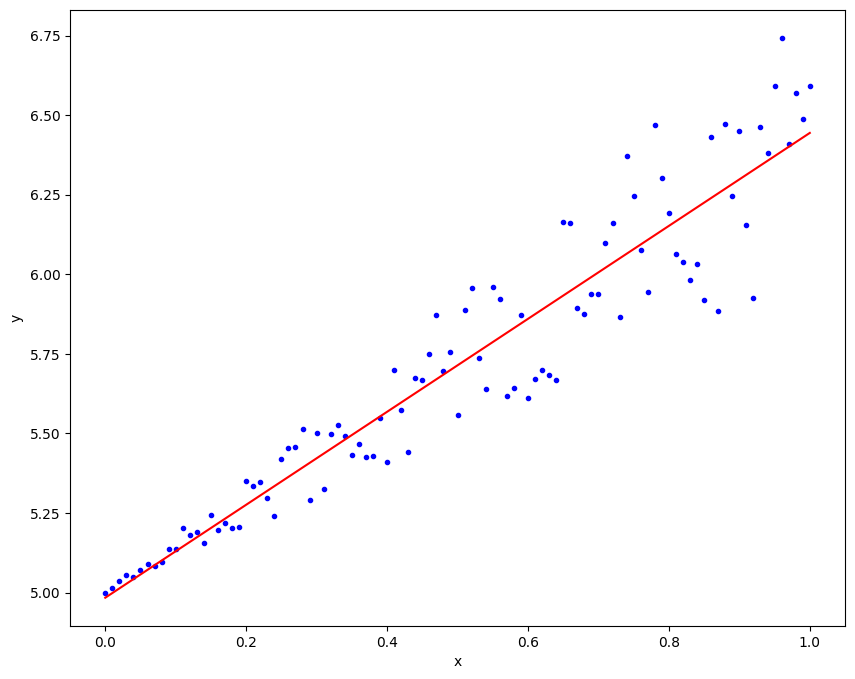

In [79]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# generate x and y data points
x = np.linspace(0, 1, 101)
y = 5 + x + 0.9 * x * np.random.random(len(x))

# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

# Using pseudoinverse
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

# plot results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

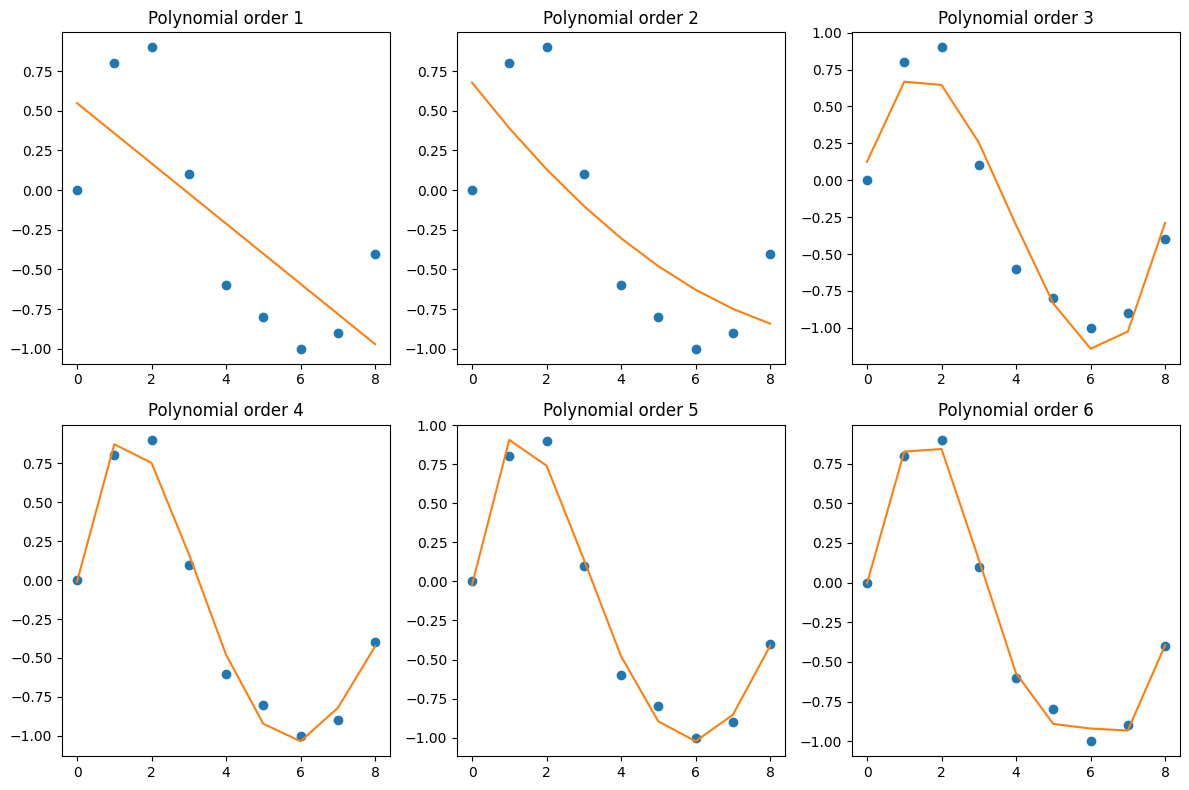

In [81]:
# For nonlinear equations, we can use polyfit

x_d = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y_d = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])

plt.figure(figsize = (12, 8))
for i in range(1, 7):

    # get the polynomial coefficients
    y_est = np.polyfit(x_d, y_d, i)
    plt.subplot(2,3,i)
    plt.plot(x_d, y_d, 'o')
    # evaluate the values for a polynomial
    plt.plot(x_d, np.polyval(y_est, x_d))
    plt.title(f'Polynomial order {i}')

plt.tight_layout()
plt.show()

In [86]:
# we can also estimate a model for some data points and use curve_fit to obtain the parameters:
from scipy import optimize

# data with some random noise
a = np.pi
b = 0.3
x = np.linspace(0, 10, 101)
y = a*np.exp(b*x) + 0.1*np.random.random(len(x))

def func(x, a, b):
    y = a*np.exp(b*x)
    return y

alpha, beta = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(f'alpha={alpha}, beta={beta}')

alpha=3.1636045975321294, beta=0.29934924555921405
